### 1. Carga datos

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv(r"../data_sample/Bird Strikes Test.csv")
df

C:\Users\lllse\AppData\Local\Temp\ipykernel_22764\1062680862.py:1: DtypeWarning: Columns (7,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"../data_sample/Bird Strikes Test.csv")


,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,227413,No damage,2.0,NORTHWEST AIRLINES,Michigan,...,NaN,NaN,NaN,NaN,0,0,0,NaN,400,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,226578,No damage,2.0,NORTHWEST AIRLINES,Wisconsin,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,268383,Caused damage,1.0,PRIVATELY OWNED,Tennessee,...,NaN,Day,NaN,NaN,0,0,0,0.0,0,20
3,SACRAMENTO INTL,< 1000 ft,B-737-300,NaN,1/1/2005 0:00,229514,Caused damage,2.0,SOUTHWEST AIRLINES,California,...,2140.0,Night,Y,NaN,0,"117,135","117,135",NaN,500,142
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,225661,No damage,2.0,UNITED AIRLINES,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65605,CHARLOTTE/DOUGLAS INTL ARPT,< 1000 ft,A-319,NaN,12/31/2011 0:00,319591,No damage,2.0,US AIRWAYS,North Carolina,...,1025.0,Day,NaN,NaN,0,0,0,0.0,75,140.0
65606,KANSAS CITY INTL,Unknown,UNKNOWN,NaN,12/31/2011 0:00,319983,No damage,NaN,UNKNOWN,Missouri,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN
65607,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,NaN,12/31/2011 0:00,319593,Caused damage,2.0,XTRA AIRWAYS,Illinois,...,1026.0,Day,N,5,0,0,0,0.0,0,165.0
65608,PORTLAND INTL (OR),Unknown,B-737-300,Precautionary Landing,12/31/2011 0:00,319589,Caused damage,2.0,SOUTHWEST AIRLINES,Oregon,...,1220.0,Day,Y,NaN,0,"252,000","252,000",0.0,NaN,NaN


### 2. Problema de Machine Learning

#### 2.1 Suficiencia de datos
El dataset contiene 65.610 filas y 23 columnas, una cantidad amplia y adecuada para entrenar modelos de Machine Learning sin problemas de escasez de datos.


#### 2.2 Formato y calidad inicial
Los datos vienen en un archivo CSV, un formato manejable y estándar.
Aparece un aviso de pandas indicando que algunas columnas tienen tipos mezclados, pero esto es habitual y puede corregirse durante el preprocesado.


#### 2.3 Relevancia de las variables
El dataset incluye información útil para modelar fenómenos relacionados con impactos de aves, como:
- Aeropuerto
- Altitud
- Modelo de avión
- Fecha del vuelo
- Número de motores
- Daños indicados
- Operador aéreo
Estas variables permiten construir un modelo predictivo con sentido.


#### 2.4 Justificación del uso de Machine Learning
El problema de los bird strikes es real y relevante en aviación.
Predecir si un impacto causará daño puede ayudar a:
- mejorar la seguridad,
- identificar condiciones de riesgo,
- optimizar decisiones operativas.
Los patrones en altura, aeropuerto, tipo de avión o fecha son adecuados para ser aprendidos por un modelo.


#### 2.5 Variable objetivo
La columna “Effect: Indicated Damage” es una variable objetivo clara y útil.
Permite plantear un problema de clasificación binaria:
- No damage
- Caused damage
Esto define un objetivo concreto y viable para un modelo supervisado


### 3. dividir train y test

In [3]:
df["damage_binary"] = df["Effect: Indicated Damage"].map({
    "No damage": 0,
    "Caused damage": 1
})


In [4]:
df = df.drop(columns=["Effect: Indicated Damage"])

In [5]:
from sklearn.model_selection import train_test_split

y = df["damage_binary"]
X = df.drop(columns=["damage_binary"])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
y

0        0
1        0
2        1
3        1
4        0
        ..
65605    0
65606    0
65607    1
65608    1
65609    1
Name: damage_binary, Length: 65610, dtype: int64

### 4. Target

In [7]:
y = df["damage_binary"]

### 5. Comprension de variables

In [8]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65610 entries, 0 to 65609
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Airport: Name                               65601 non-null  object 
 1   Altitude bin                                65610 non-null  object 
 2   Aircraft: Make/Model                        65610 non-null  object 
 3   Effect: Impact to flight                    3269 non-null   object 
 4   FlightDate                                  65610 non-null  object 
 5   Record ID                                   65610 non-null  int64  
 6   Aircraft: Number of engines?                42766 non-null  object 
 7   Aircraft: Airline/Operator                  65610 non-null  object 
 8   Origin State                                59163 non-null  object 
 9   When: Phase of flight                       41051 non-null  object 
 10  Wildlife: 

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,...,When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots,damage_binary
count,65601,65610,65610,3269,65610,65610.000000,42766.0,65610,59163,41051,...,41858,28361,4363,65610,65610,65610,37867,35069,25315,65610.000000
unique,1448,3,454,4,2556,NaN,9.0,299,62,9,...,4,2,198,466,1032,1286,94,329,371,NaN
top,UNKNOWN,Unknown,UNKNOWN,Precautionary Landing,9/30/2011 0:00,NaN,2.0,UNKNOWN,Texas,Approach,...,Day,N,0,0,0,0,0,0,140,NaN
freq,5989,30541,19540,1767,84,NaN,18812.0,16342,5657,16914,...,25269,15261,1348,64576,64029,63462,18560,14184,1465,NaN
mean,NaN,NaN,NaN,NaN,NaN,246208.681116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062109
std,NaN,NaN,NaN,NaN,NaN,80226.508941,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.241356
min,NaN,NaN,NaN,NaN,NaN,9005.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,240765.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,257226.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,303635.750000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


#### 5.1 Variables categóricas
La mayoría de las columnas del dataset son categóricas. Estas variables representan información cualitativa que describe el contexto del incidente. Entre ellas destacan:
- Airport Name: identifica el aeropuerto donde ocurrió el impacto.
Puede aportar información sobre zonas geográficas con mayor riesgo, condiciones climáticas típicas o presencia de fauna local.
- Altitude bin: clasifica la altitud del impacto en rangos (“< 1000 ft”, “Unknown”, etc.).
Es una variable clave, ya que la altitud influye directamente en la probabilidad de colisión con aves.
- Aircraft Make/Model: modelo del avión implicado.
Puede influir en la probabilidad de daño según tamaño, materiales o diseño.
- Effect: Impact to flight: describe el efecto inmediato del impacto (p. ej., “Other”, “Precautionary Landing”).
Aunque no es el target, puede correlacionar con la severidad del daño.
- Effect: Indicated Damage (target): indica si el impacto causó daño.
Es la variable objetivo del modelo.
- Airline/Operator: compañía aérea responsable del vuelo.
Puede reflejar diferencias operativas, rutas o protocolos.
- Otras columnas categóricas: como tipo de motor, fase del vuelo, condiciones del entorno, etc.
Estas variables requerirán codificación (One-Hot Encoding, Target Encoding, etc.) para ser utilizadas por modelos de ML.


#### 5.2 Variables numéricas
Aunque el dataset es mayoritariamente categórico, incluye algunas variables numéricas:
- Aircraft: Number of engines: número de motores del avión.
Puede influir en la probabilidad de daño, ya que más motores pueden implicar mayor exposición.
- Record ID: identificador único del registro.
No aporta información predictiva → candidata a eliminar.
Estas variables pueden requerir escalado o tratamiento de valores faltantes.


#### 5.3 Variables temporales
- FlightDate: fecha del vuelo.
Es una variable muy valiosa, ya que permite extraer nuevas características como:
- año
- mes
- estación del año
- día de la semana
- si es temporada migratoria
Estas transformaciones pueden mejorar significativamente la capacidad predictiva del modelo.


### 6. Feat. Red. Preliminar

In [9]:
# --- 1. Identificar columnas con problemas de tipos (según el warning) ---
cols_with_mixed_types = [7, 20, 22]
print("Columnas con tipos mezclados:")
for col in cols_with_mixed_types:
    print(f"{col} → {df.columns[col]}")

Columnas con tipos mezclados:
7 → Aircraft: Airline/Operator
20 → Feet above ground
22 → damage_binary


In [10]:
df[df.columns[cols_with_mixed_types]].isna().sum()

Aircraft: Airline/Operator        0
Feet above ground             30541
damage_binary                     0
dtype: int64

In [11]:
(df[df.columns[cols_with_mixed_types]].isna().mean() * 100).round(2)

Aircraft: Airline/Operator     0.00
Feet above ground             46.55
damage_binary                  0.00
dtype: float64

In [12]:
cols_to_drop_prelim = []

# Speed tiene demasiados NaNs
cols_to_drop_prelim.append("Speed (IAS) in knots")

# Las otras dos se mantienen por ahora
cols_to_keep_prelim = [
    "Aircraft: Number of engines?",
    "Miles from airport"
]

cols_to_drop_prelim, cols_to_keep_prelim


(['Speed (IAS) in knots'],
 ['Aircraft: Number of engines?', 'Miles from airport'])

In [13]:
# --- 2. Identificar columnas con muchos valores faltantes ---
missing = df.isna().mean().sort_values(ascending=False)
print("Porcentaje de missing values por columna:")
print(missing)


Porcentaje de missing values por columna:
Effect: Impact to flight                      0.950175
Cost: Aircraft time out of service (hours)    0.933501
Speed (IAS) in knots                          0.614159
Pilot warned of birds or wildlife?            0.567734
Feet above ground                             0.465493
When: Time (HHMM)                             0.441610
Miles from airport                            0.422847
When: Phase of flight                         0.374318
When: Time of day                             0.362018
Aircraft: Number of engines?                  0.348179
Wildlife: Size                                0.136046
Origin State                                  0.098262
Wildlife: Species                             0.000259
Airport: Name                                 0.000137
Altitude bin                                  0.000000
Aircraft: Airline/Operator                    0.000000
Cost: Other (inflation adj)                   0.000000
Cost: Repair (inflation

In [14]:
# --- 3. Identificar columnas con cardinalidad alta ---
cardinality = df.nunique().sort_values(ascending=False)
print("Cardinalidad de cada columna:")
print(cardinality)

Cardinalidad de cada columna:
Record ID                                     65610
FlightDate                                     2556
Airport: Name                                  1448
When: Time (HHMM)                              1412
Cost: Total $                                  1286
Cost: Repair (inflation adj)                   1032
Wildlife: Species                               573
Cost: Other (inflation adj)                     466
Aircraft: Make/Model                            454
Speed (IAS) in knots                            371
Feet above ground                               329
Aircraft: Airline/Operator                      299
Cost: Aircraft time out of service (hours)      198
Miles from airport                               94
Origin State                                     62
When: Phase of flight                             9
Aircraft: Number of engines?                      9
When: Time of day                                 4
Effect: Impact to flight          

In [15]:
# --- 4. Marcar columnas candidatas a eliminar ---
cols_to_drop = []

# ID único → no aporta información
if "Record ID" in df.columns:
    cols_to_drop.append("Record ID")

# Columnas con tipos mezclados
cols_to_drop.extend(df.columns[cols_with_mixed_types])

print("Columnas candidatas a eliminar:")
print(cols_to_drop)

Columnas candidatas a eliminar:
['Record ID', 'Aircraft: Airline/Operator', 'Feet above ground', 'damage_binary']


### 7. Análisis univariante

In [16]:
# separar variables numericas y categóricas

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Variables numéricas:", list(num_cols))
print("Variables categóricas:", list(cat_cols))



Variables numéricas: ['Record ID', 'When: Time (HHMM)', 'damage_binary']
Variables categóricas: ['Airport: Name', 'Altitude bin', 'Aircraft: Make/Model', 'Effect: Impact to flight', 'FlightDate', 'Aircraft: Number of engines?', 'Aircraft: Airline/Operator', 'Origin State', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species', 'When: Time of day', 'Pilot warned of birds or wildlife?', 'Cost: Aircraft time out of service (hours)', 'Cost: Other (inflation adj)', 'Cost: Repair (inflation adj)', 'Cost: Total $', 'Miles from airport', 'Feet above ground', 'Speed (IAS) in knots']


In [17]:
# analisis univariante de variables numéricas
df[num_cols].describe()

,Record ID,When: Time (HHMM),damage_binary
count,65610.000000,36636.000000,65610.000000
mean,246208.681116,1389.074271,0.062109
std,80226.508941,613.410508,0.241356
min,9005.000000,0.000000,0.000000
25%,240765.250000,915.000000,0.000000
50%,257226.500000,1410.000000,0.000000
75%,303635.750000,1930.000000,0.000000
max,322935.000000,2359.000000,1.000000


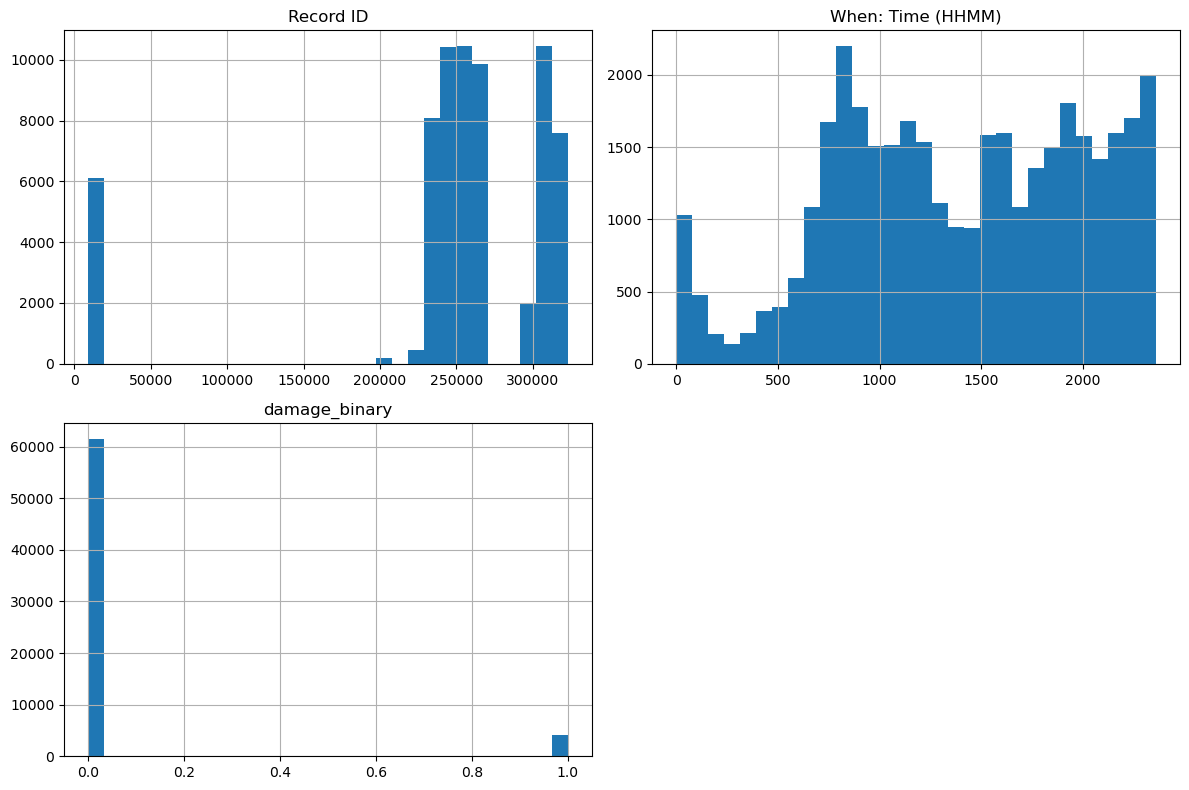

In [18]:
# histogramas
import matplotlib.pyplot as plt

df[num_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

In [19]:
# variables categóricas
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10))


--- Airport: Name ---
Airport: Name
UNKNOWN                        5989
DENVER INTL AIRPORT            2351
DALLAS/FORT WORTH INTL ARPT    1819
MEMPHIS INTL                   1234
JOHN F KENNEDY INTL            1228
CHICAGO O'HARE INTL ARPT       1124
SACRAMENTO INTL                1041
LOUISVILLE INTL ARPT            964
SALT LAKE CITY INTL             849
KANSAS CITY INTL                846
Name: count, dtype: int64

--- Altitude bin ---
Altitude bin
Unknown      30541
< 1000 ft    27523
> 1000 ft     7546
Name: count, dtype: int64

--- Aircraft: Make/Model ---
Aircraft: Make/Model
UNKNOWN         19540
B-737-700        3634
CL-RJ100/200     3133
B-737-300        2912
A-320            2825
B-757-200        2363
A-319            1967
A-300            1748
EMB-145          1618
B-737-800        1132
Name: count, dtype: int64

--- Effect: Impact to flight ---
Effect: Impact to flight
NaN                      62341
Precautionary Landing     1767
Other                      812
Aborted Ta

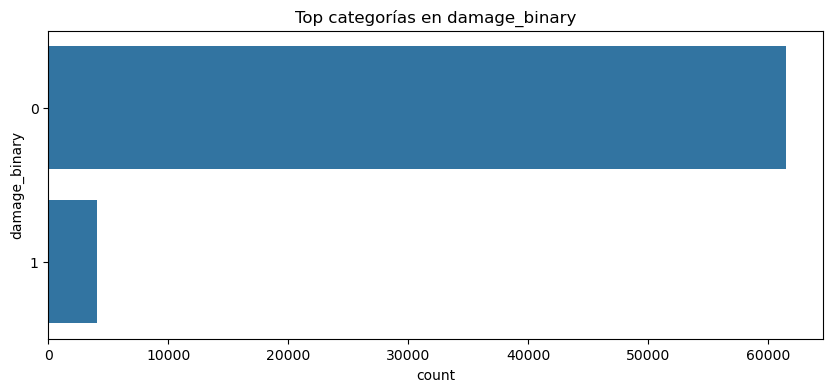

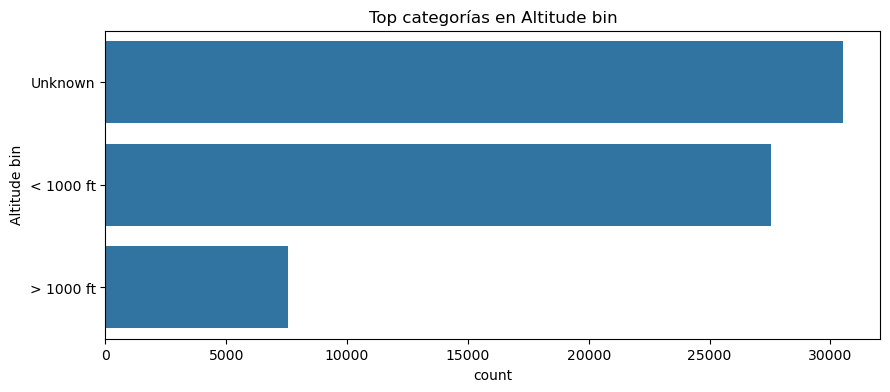

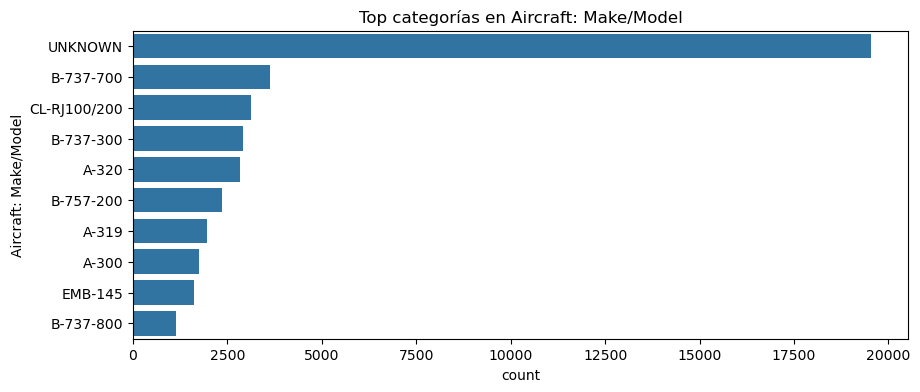

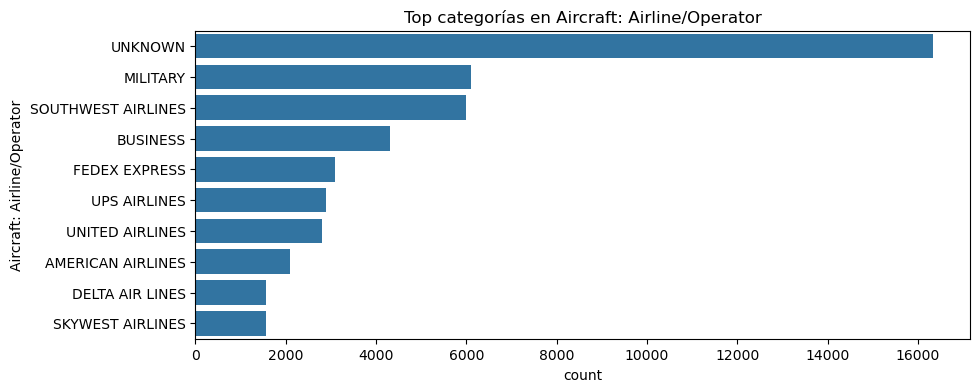

In [20]:
#gráficos de barras
import seaborn as sns

important_cats = [
    "damage_binary",
    "Altitude bin",
    "Aircraft: Make/Model",
    'Aircraft: Airline/Operator'
]

for col in important_cats:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top categorías en {col}")
    plt.show()

In [21]:
df["damage_binary"].value_counts(normalize=True) * 100

damage_binary
0    93.789057
1     6.210943
Name: proportion, dtype: float64

### 8. Análisis bivariante

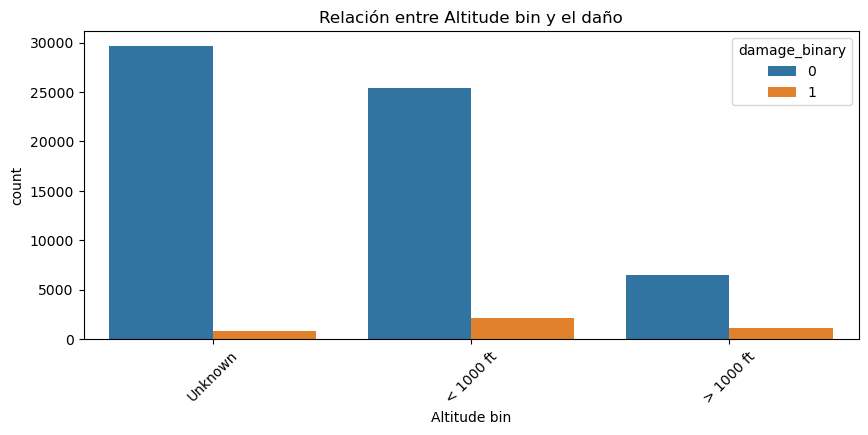

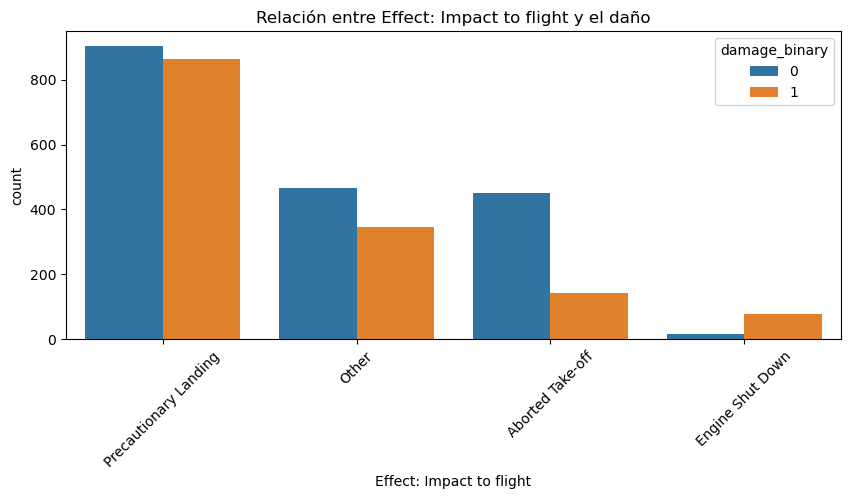

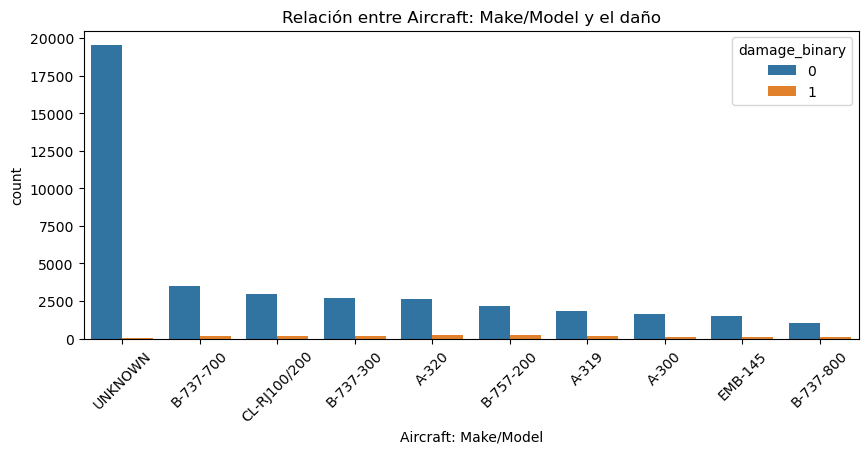

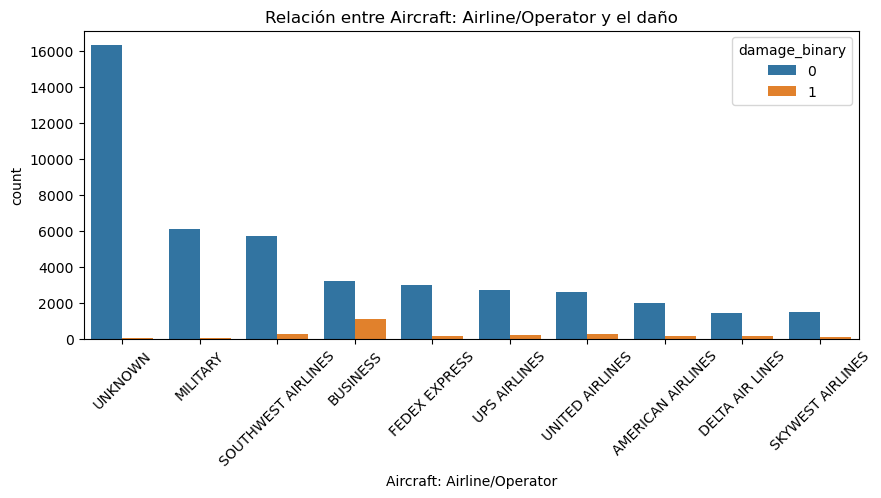

In [22]:
# analisis bivariante entre categóricas y target
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = [
    "Altitude bin",
    "Effect: Impact to flight",
    "Aircraft: Make/Model",
    'Aircraft: Airline/Operator'
]

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(10,4))
        sns.countplot(data=df, x=col, hue="damage_binary",
                      order=df[col].value_counts().index[:10])
        plt.title(f"Relación entre {col} y el daño")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Columna no encontrada: {col}")

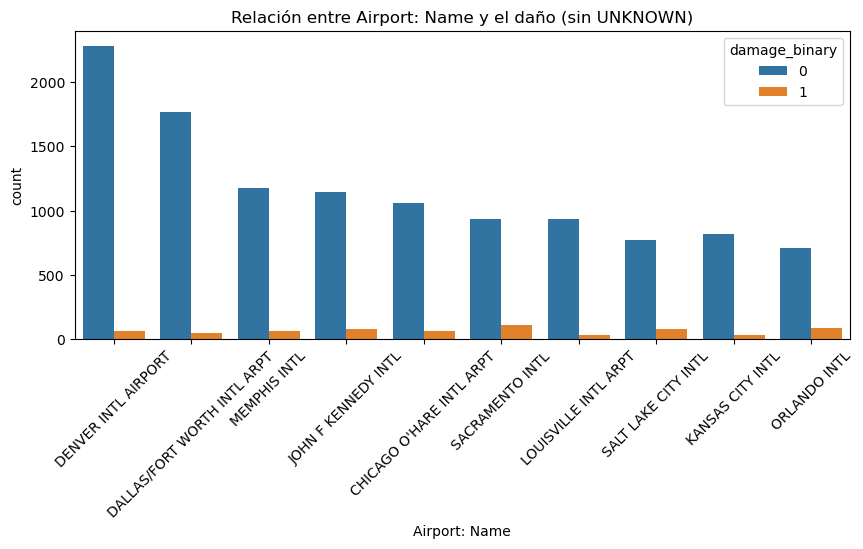

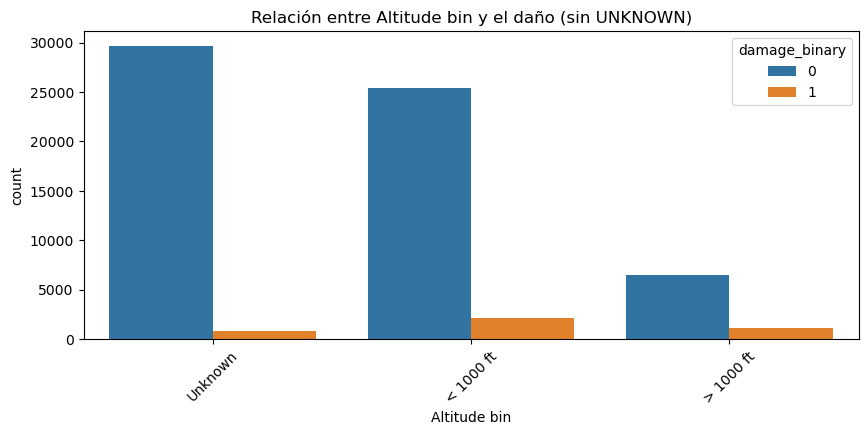

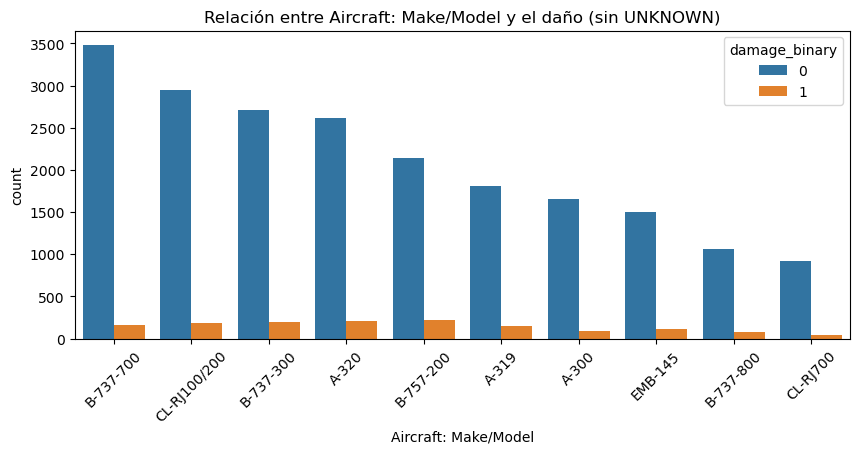

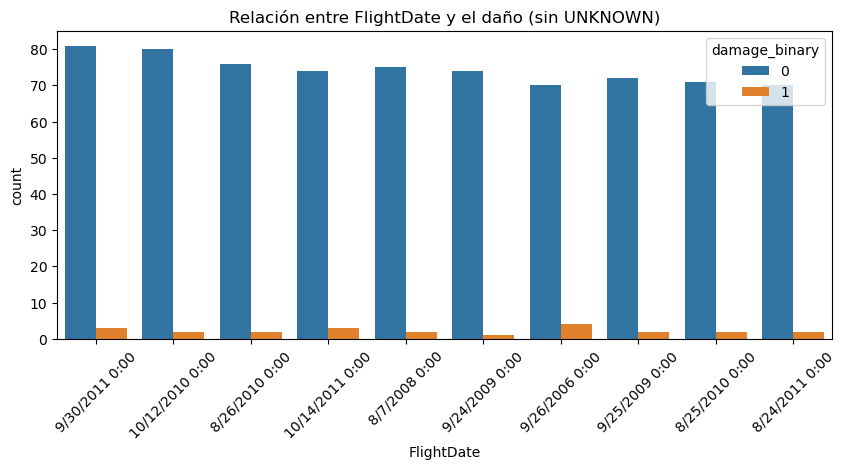

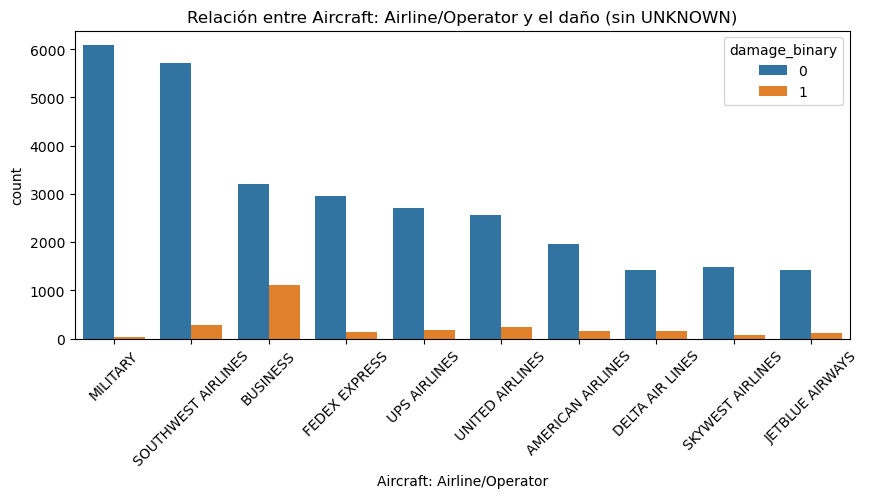

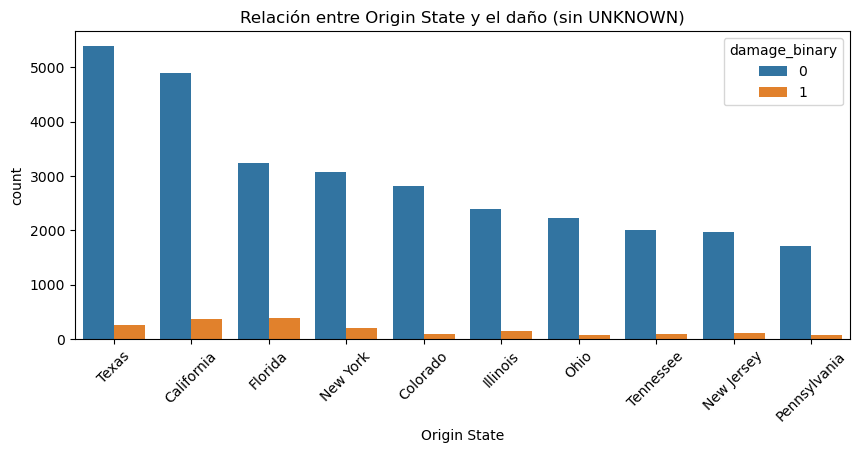

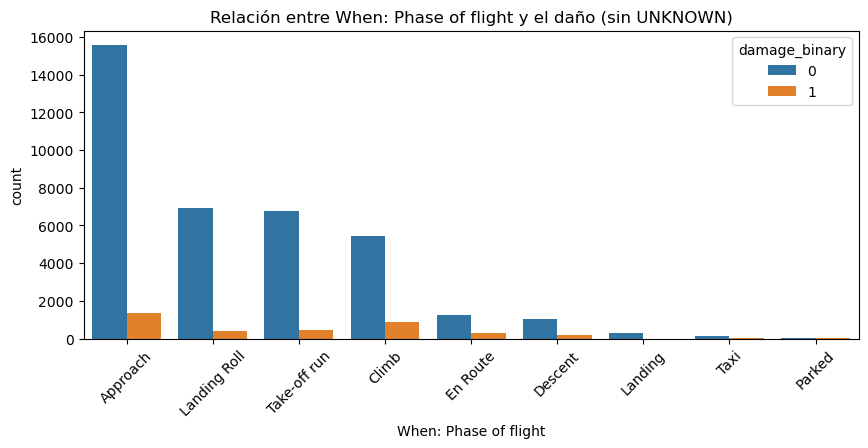

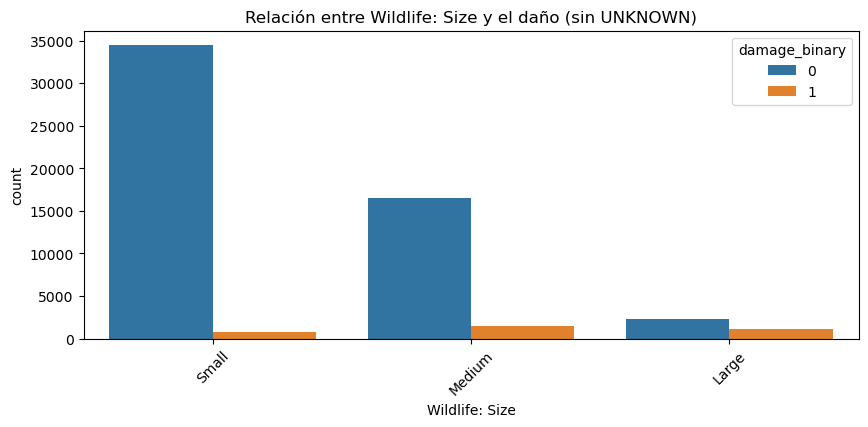

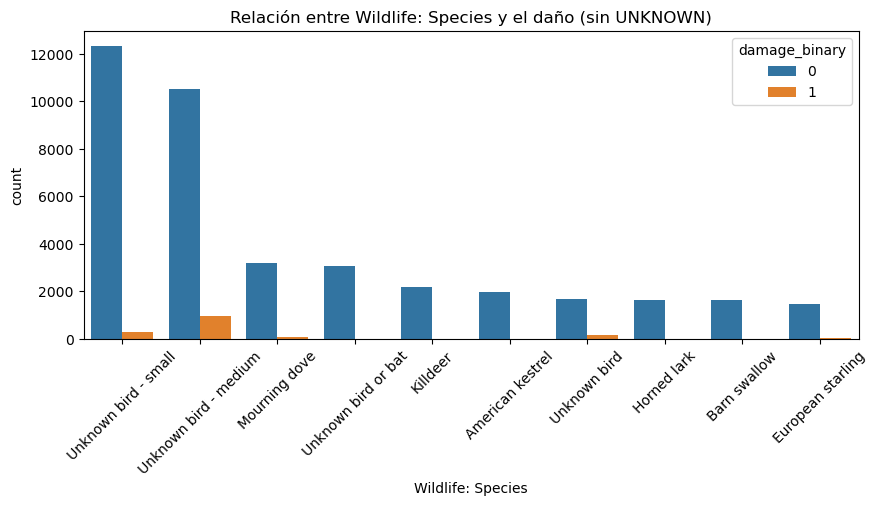

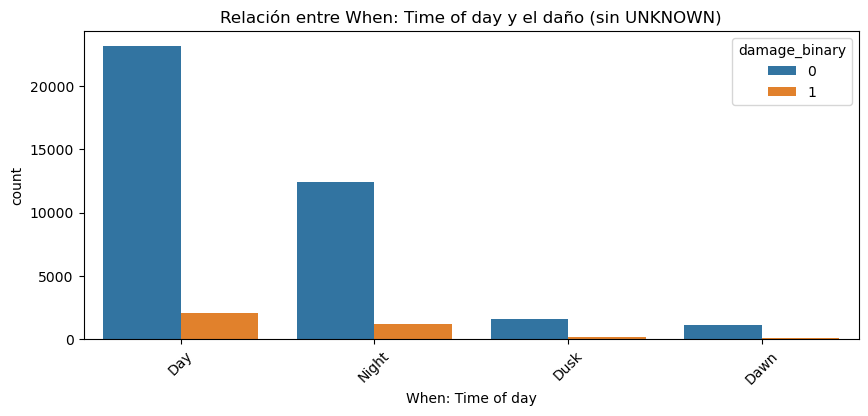

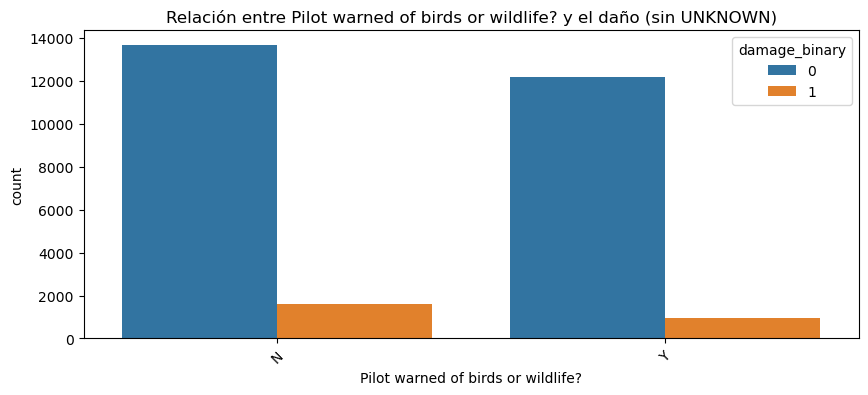

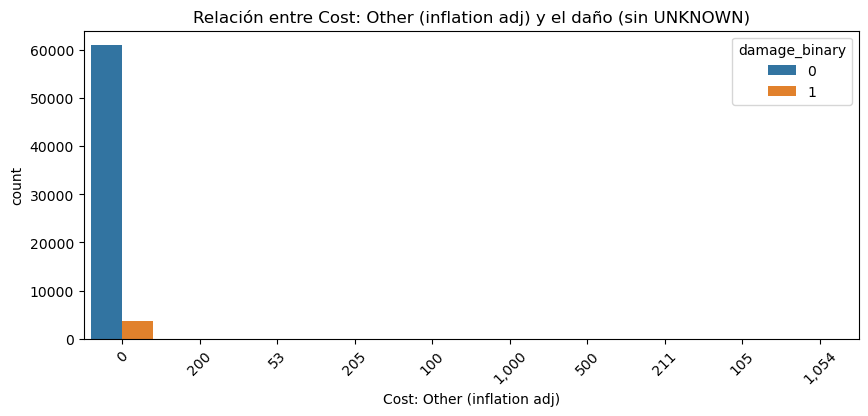

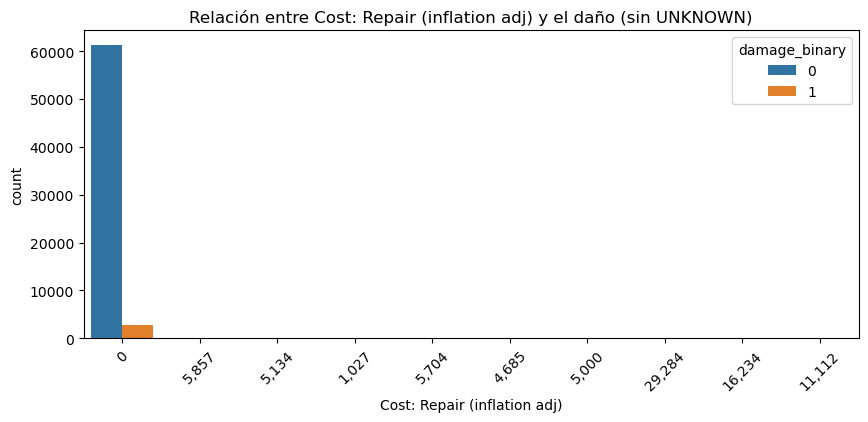

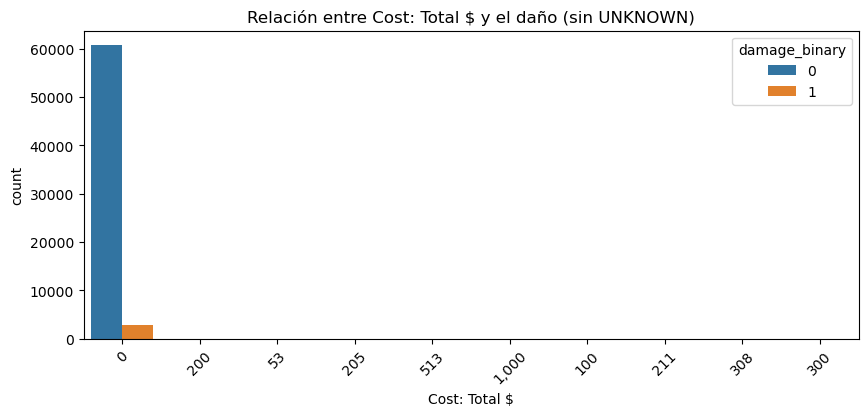

In [63]:
# Sin unknown
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(10,4))

        # Filtrar la categoría UNKNOWN
        df_filtrado = df[df[col] != "UNKNOWN"]

        sns.countplot(
            data=df_filtrado,
            x=col,
            hue="damage_binary",
            order=df_filtrado[col].value_counts().index[:10]
        )

        plt.title(f"Relación entre {col} y el daño (sin UNKNOWN)")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Columna no encontrada: {col}")

In [23]:
for col in ["Aircraft: Number of engines?", "Miles from airport"]:
    print(f"\nValores no numéricos en {col}:")
    print(df[col].dropna().unique()[:20])


Valores no numéricos en Aircraft: Number of engines?:
[2.0 1.0 4.0 3.0 '2' '3' '1' '4' 'S']

Valores no numéricos en Miles from airport:
[0.0 12.0 13.0 20.0 3.0 8.0 5.0 50.0 7.0 1.0 6.0 15.0 10.0 19.0 14.0 35.0
 5.5 30.0 2.0 4.0]


In [24]:
df["Aircraft: Number of engines?"] = pd.to_numeric(df["Aircraft: Number of engines?"], errors="coerce")
df["Miles from airport"] = pd.to_numeric(df["Miles from airport"], errors="coerce")

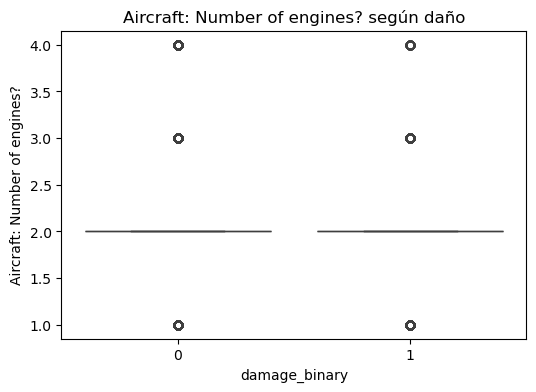

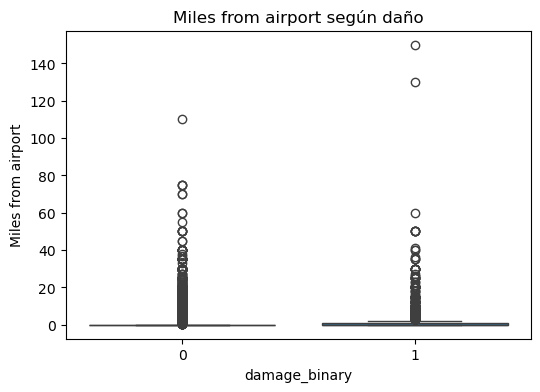

In [25]:
# variables numéricas vs target

num_cols = ["Aircraft: Number of engines?", "Miles from airport"]

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x="damage_binary", y=col)
        plt.title(f"{col} según daño")
        plt.show()
    else:
        print(f"Columna no encontrada: {col}")


### 9. Eliminacion Features

In [26]:
for col in df.columns:
    print(f"'{col}'")

'Airport: Name'
'Altitude bin'
'Aircraft: Make/Model'
'Effect: Impact to flight'
'FlightDate'
'Record ID'
'Aircraft: Number of engines?'
'Aircraft: Airline/Operator'
'Origin State'
'When: Phase of flight'
'Wildlife: Size'
'Wildlife: Species'
'When: Time (HHMM)'
'When: Time of day'
'Pilot warned of birds or wildlife?'
'Cost: Aircraft time out of service (hours)'
'Cost: Other (inflation adj)'
'Cost: Repair (inflation adj)'
'Cost: Total $'
'Miles from airport'
'Feet above ground'
'Speed (IAS) in knots'
'damage_binary'


In [27]:
cols_to_drop = [
    "Record ID",
    "Speed (IAS) in knots"
]

# Eliminar duplicados
cols_to_drop = list(set(cols_to_drop))

print("Columnas que se eliminarán:")
cols_to_drop

Columnas que se eliminarán:


['Speed (IAS) in knots', 'Record ID']

In [28]:
df_clean = df.drop(columns=cols_to_drop)
df_clean.head()


,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,damage_binary
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,2.0,NORTHWEST AIRLINES,Michigan,Climb,Medium,...,NaN,NaN,NaN,NaN,0,0,0,NaN,400,0
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,2.0,NORTHWEST AIRLINES,Wisconsin,Take-off run,Medium,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,1.0,PRIVATELY OWNED,Tennessee,Landing Roll,Large,...,NaN,Day,NaN,NaN,0,0,0,0.0,0,1
3,SACRAMENTO INTL,< 1000 ft,B-737-300,NaN,1/1/2005 0:00,2.0,SOUTHWEST AIRLINES,California,Approach,Large,...,2140.0,Night,Y,NaN,0,"117,135","117,135",NaN,500,1
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,2.0,UNITED AIRLINES,NaN,Landing Roll,Medium,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0


### 10. Duplicados

In [29]:
df_clean.duplicated().sum()

953

In [30]:
# ver duplicados 
df_clean[df_clean.duplicated()]

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,damage_binary
45,UNKNOWN,Unknown,A-320,NaN,1/6/2005 0:00,2.0,UNITED AIRLINES,NaN,NaN,Medium,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,0
384,LOGAN INTL,Unknown,UNKNOWN,NaN,2/14/2005 0:00,NaN,UNKNOWN,Massachusetts,NaN,Large,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,0
466,AUSTIN-BERGSTROM INTL,Unknown,UNKNOWN,NaN,2/24/2005 0:00,NaN,UNKNOWN,Texas,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,0
467,AUSTIN-BERGSTROM INTL,Unknown,UNKNOWN,NaN,2/24/2005 0:00,NaN,UNKNOWN,Texas,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,0
491,AUSTIN-BERGSTROM INTL,Unknown,UNKNOWN,NaN,2/26/2005 0:00,NaN,UNKNOWN,Texas,NaN,Small,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,UNKNOWN,Unknown,EMB-145,NaN,11/4/2011 0:00,2.0,AMERICAN EAGLE AIRLINES,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,0
64854,MCGHEE TYSON ARPT,Unknown,UNKNOWN,NaN,11/11/2011 0:00,NaN,UNKNOWN,Tennessee,NaN,Small,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,0
64857,HONOLULU INTL ARPT,Unknown,UNKNOWN,NaN,11/11/2011 0:00,NaN,UNKNOWN,Hawaii,NaN,Small,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,0
64880,CHICAGO O'HARE INTL ARPT,Unknown,UNKNOWN,NaN,11/12/2011 0:00,NaN,UNKNOWN,Illinois,NaN,Small,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,0


In [31]:
# eliminamos
df_clean = df_clean.drop_duplicates()

In [32]:
# comprobamos
df_clean.duplicated().sum()


0

### 11. Missings

In [33]:
df_clean.isna().sum().sort_values(ascending=False)

Effect: Impact to flight                      61389
Cost: Aircraft time out of service (hours)    60305
Pilot warned of birds or wildlife?            36328
Feet above ground                             29607
When: Time (HHMM)                             28091
Miles from airport                            27353
When: Phase of flight                         23644
When: Time of day                             22846
Aircraft: Number of engines?                  22224
Wildlife: Size                                 8821
Origin State                                   6150
Wildlife: Species                                17
Airport: Name                                     9
Altitude bin                                      0
Aircraft: Airline/Operator                        0
Cost: Other (inflation adj)                       0
Cost: Repair (inflation adj)                      0
Cost: Total $                                     0
FlightDate                                        0
Aircraft: Ma

In [34]:
#porcentaje
(df_clean.isna().mean() * 100).round(2).sort_values(ascending=False)

Effect: Impact to flight                      94.95
Cost: Aircraft time out of service (hours)    93.27
Pilot warned of birds or wildlife?            56.19
Feet above ground                             45.79
When: Time (HHMM)                             43.45
Miles from airport                            42.30
When: Phase of flight                         36.57
When: Time of day                             35.33
Aircraft: Number of engines?                  34.37
Wildlife: Size                                13.64
Origin State                                   9.51
Wildlife: Species                              0.03
Airport: Name                                  0.01
Altitude bin                                   0.00
Aircraft: Airline/Operator                     0.00
Cost: Other (inflation adj)                    0.00
Cost: Repair (inflation adj)                   0.00
Cost: Total $                                  0.00
FlightDate                                     0.00
Aircraft: Ma

In [35]:
#imputar
df_clean["Aircraft: Number of engines?"] = df_clean["Aircraft: Number of engines?"].fillna(
    df_clean["Aircraft: Number of engines?"].mode()[0]
)

df_clean["Miles from airport"] = df_clean["Miles from airport"].fillna(
    df_clean["Miles from airport"].median()
)

df_clean["Feet above ground"] = pd.to_numeric(
    df_clean["Feet above ground"], errors="coerce"
)

df_clean["Feet above ground"] = df_clean["Feet above ground"].fillna(
    df_clean["Feet above ground"].median()
)


In [36]:
#imputación categórica
cat_cols = df_clean.select_dtypes(include="object").columns

for col in cat_cols:
    df_clean[col] = df_clean[col].fillna("Unknown")

In [37]:
#eliminar <90% missings

cols_to_drop_missing = [
    "Effect: Impact to flight",
    "Cost: Aircraft time out of service (hours)"
]

df_clean = df_clean.drop(columns=cols_to_drop_missing)

In [38]:
#time
df_clean["When: Time (HHMM)"] = (
    df_clean["When: Time (HHMM)"]
    .astype(str)
    .str.replace(r"[^0-9]", "", regex=True)
)


In [39]:
df_clean["When: Time (HHMM)"] = df_clean["When: Time (HHMM)"].str.zfill(4)

In [40]:
df_clean["hour"] = df_clean["When: Time (HHMM)"].str[:2].astype(int)
df_clean["minute"] = df_clean["When: Time (HHMM)"].str[2:].astype(int)

In [41]:
df_clean = df_clean.drop(columns=["When: Time (HHMM)"])

Comprobación

In [42]:
df_clean.isna().sum().sort_values(ascending=False)

Airport: Name                         0
Altitude bin                          0
hour                                  0
damage_binary                         0
Feet above ground                     0
Miles from airport                    0
Cost: Total $                         0
Cost: Repair (inflation adj)          0
Cost: Other (inflation adj)           0
Pilot warned of birds or wildlife?    0
When: Time of day                     0
Wildlife: Species                     0
Wildlife: Size                        0
When: Phase of flight                 0
Origin State                          0
Aircraft: Airline/Operator            0
Aircraft: Number of engines?          0
FlightDate                            0
Aircraft: Make/Model                  0
minute                                0
dtype: int64

In [43]:
df_clean.isna().sum().sort_values(ascending=False).head(10)

Airport: Name                         0
Altitude bin                          0
hour                                  0
damage_binary                         0
Feet above ground                     0
Miles from airport                    0
Cost: Total $                         0
Cost: Repair (inflation adj)          0
Cost: Other (inflation adj)           0
Pilot warned of birds or wildlife?    0
dtype: int64

In [44]:
df_clean.dtypes

Airport: Name                          object
Altitude bin                           object
Aircraft: Make/Model                   object
FlightDate                             object
Aircraft: Number of engines?          float64
Aircraft: Airline/Operator             object
Origin State                           object
When: Phase of flight                  object
Wildlife: Size                         object
Wildlife: Species                      object
When: Time of day                      object
Pilot warned of birds or wildlife?     object
Cost: Other (inflation adj)            object
Cost: Repair (inflation adj)           object
Cost: Total $                          object
Miles from airport                    float64
Feet above ground                     float64
damage_binary                           int64
hour                                    int32
minute                                  int32
dtype: object

### 12. Anomalías y Errores

In [45]:
# valores negativos
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    negativos = df_clean[df_clean[col] < 0]
    if len(negativos) > 0:
        print(f"Valores negativos encontrados en {col}: {len(negativos)}")


In [46]:
df_clean[(df_clean["hour"] > 23) | (df_clean["hour"] < 0)]
df_clean[(df_clean["minute"] > 59) | (df_clean["minute"] < 0)]

,Airport: Name,Altitude bin,Aircraft: Make/Model,FlightDate,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time of day,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,damage_binary,hour,minute
3,SACRAMENTO INTL,< 1000 ft,B-737-300,1/1/2005 0:00,2.0,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,Night,Y,0,"117,135","117,135",0.0,500.0,1,21,400
5,HENDERSON FIELD,< 1000 ft,LOCKHEED C-130,1/2/2005 0:00,4.0,GOVERNMENT,Prince Edward Island,Take-off run,Large,Laysan albatross,Day,Y,0,0,0,0.0,0.0,1,13,400
6,SAN FRANCISCO INTL ARPT,< 1000 ft,B-757-200,1/2/2005 0:00,2.0,UNITED AIRLINES,California,Approach,Small,Unknown bird - small,Night,Unknown,0,0,0,0.0,50.0,0,50,70
11,SAVANNAH INTL,< 1000 ft,CL-RJ100/200,1/3/2005 0:00,2.0,ATLANTIC SOUTHEAST,Georgia,Take-off run,Medium,Unknown bird - medium,Day,N,0,0,0,0.0,0.0,0,13,150
16,SACRAMENTO INTL,Unknown,B-737-700,1/3/2005 0:00,2.0,SOUTHWEST AIRLINES,California,Approach,Large,Unknown bird - large,Night,Unknown,0,0,0,0.0,0.0,1,19,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65598,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,12/31/2011 0:00,2.0,DELTA AIR LINES,Michigan,Landing Roll,Medium,Unknown bird - medium,Night,Y,0,0,0,0.0,0.0,0,17,300
65605,CHARLOTTE/DOUGLAS INTL ARPT,< 1000 ft,A-319,12/31/2011 0:00,2.0,US AIRWAYS,North Carolina,Climb,Small,Rock pigeon,Day,Unknown,0,0,0,0.0,75.0,0,10,250
65607,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,12/31/2011 0:00,2.0,XTRA AIRWAYS,Illinois,Take-off run,Medium,Red-tailed hawk,Day,N,0,0,0,0.0,0.0,1,10,260
65608,PORTLAND INTL (OR),Unknown,B-737-300,12/31/2011 0:00,2.0,SOUTHWEST AIRLINES,Oregon,Climb,Medium,Glaucous-winged gull,Day,Y,0,"252,000","252,000",0.0,0.0,1,12,200


In [47]:
df_clean[df_clean["Aircraft: Number of engines?"] == 0]

,Airport: Name,Altitude bin,Aircraft: Make/Model,FlightDate,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time of day,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,damage_binary,hour,minute


In [48]:
df_clean[df_clean["Miles from airport"] > 200]

,Airport: Name,Altitude bin,Aircraft: Make/Model,FlightDate,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time of day,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,damage_binary,hour,minute


### 13. Outliers

In [49]:
import numpy as np

def detectar_outliers(col):
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]

for col in ["Miles from airport", "Feet above ground"]:
    outliers = detectar_outliers(col)
    print(f"{col}: {len(outliers)} outliers")

Miles from airport: 3254 outliers
Feet above ground: 12158 outliers


### 14. Feature engineering

In [50]:
df_clean["is_night"] = df_clean["hour"].apply(lambda x: 1 if x < 6 or x > 20 else 0)

In [51]:
mapa_tamano = {
    "Small": 1,
    "Medium": 2,
    "Large": 3,
    "Unknown": 0
}

df_clean["Wildlife_Size_num"] = df_clean["Wildlife: Size"].map(mapa_tamano)

#### Encoding

In [52]:
cat_cols = df_clean.select_dtypes(include="object").columns
cat_cols

Index(['Airport: Name', 'Altitude bin', 'Aircraft: Make/Model', 'FlightDate',
       'Aircraft: Airline/Operator', 'Origin State', 'When: Phase of flight',
       'Wildlife: Size', 'Wildlife: Species', 'When: Time of day',
       'Pilot warned of birds or wildlife?', 'Cost: Other (inflation adj)',
       'Cost: Repair (inflation adj)', 'Cost: Total $'],
      dtype='object')

In [53]:
map_altitude = {
    "< 1000 ft": 1,
    "1000-5000 ft": 2,
    "> 5000 ft": 3,
    "Unknown": 0
}

df_clean["Altitude_bin_num"] = df_clean["Altitude bin"].map(map_altitude)

In [54]:
df_clean = df_clean.drop(columns=["Altitude bin"])

cetegoricas nominales con pocas categorias

In [55]:
df_clean = pd.get_dummies(df_clean, columns=[
    "damage_binary",
    "When: Time of day",
    "Origin State"
], drop_first=True)

categoricas con muchas categorias

In [56]:
def agrupar_raras(col, threshold=0.01):
    freqs = df_clean[col].value_counts(normalize=True)
    raras = freqs[freqs < threshold].index
    df_clean[col] = df_clean[col].replace(raras, "Other")

In [57]:
agrupar_raras("Airport: Name", threshold=0.005)
agrupar_raras("Aircraft: Make/Model", threshold=0.005)
agrupar_raras("Wildlife: Species", threshold=0.005)

In [58]:
df_clean = pd.get_dummies(df_clean, columns=[
    "Airport: Name",
    "Aircraft: Make/Model",
    "Wildlife: Species"
], drop_first=True)

In [59]:
# ver resultado 
df_clean.head(20)

,FlightDate,Aircraft: Number of engines?,Aircraft: Airline/Operator,When: Phase of flight,Wildlife: Size,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,...,Wildlife: Species_Ring-billed gull,Wildlife: Species_Rock pigeon,Wildlife: Species_Sparrows,Wildlife: Species_Swallows,Wildlife: Species_Unknown bird,Wildlife: Species_Unknown bird - large,Wildlife: Species_Unknown bird - medium,Wildlife: Species_Unknown bird - small,Wildlife: Species_Unknown bird or bat,Wildlife: Species_Western meadowlark
0,1/1/2005 0:00,2.0,NORTHWEST AIRLINES,Climb,Medium,Unknown,0,0,0,0.0,...,False,False,False,False,False,False,True,False,False,False
1,1/1/2005 0:00,2.0,NORTHWEST AIRLINES,Take-off run,Medium,Unknown,0,0,0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,1/1/2005 0:00,1.0,PRIVATELY OWNED,Landing Roll,Large,Unknown,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1/1/2005 0:00,2.0,SOUTHWEST AIRLINES,Approach,Large,Y,0,"117,135","117,135",0.0,...,False,False,False,False,False,False,False,False,False,False
4,1/1/2005 0:00,2.0,UNITED AIRLINES,Landing Roll,Medium,Unknown,0,0,0,0.0,...,False,False,False,False,False,False,True,False,False,False
5,1/2/2005 0:00,4.0,GOVERNMENT,Take-off run,Large,Y,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
6,1/2/2005 0:00,2.0,UNITED AIRLINES,Approach,Small,Unknown,0,0,0,0.0,...,False,False,False,False,False,False,False,True,False,False
7,1/2/2005 0:00,2.0,UNKNOWN,Unknown,Medium,Unknown,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
8,1/2/2005 0:00,2.0,ASTAR AIR CARGO,Unknown,Medium,Unknown,53,0,53,0.0,...,False,False,False,False,False,False,True,False,False,False
9,1/2/2005 0:00,2.0,DELTA AIR LINES,Landing Roll,Medium,N,0,0,0,0.0,...,True,False,False,False,False,False,False,False,False,False


In [60]:
df_clean.dtypes

FlightDate                                  object
Aircraft: Number of engines?               float64
Aircraft: Airline/Operator                  object
When: Phase of flight                       object
Wildlife: Size                              object
                                            ...   
Wildlife: Species_Unknown bird - large        bool
Wildlife: Species_Unknown bird - medium       bool
Wildlife: Species_Unknown bird - small        bool
Wildlife: Species_Unknown bird or bat         bool
Wildlife: Species_Western meadowlark          bool
Length: 190, dtype: object

In [61]:
#target en binario 
df["damage_binary"].value_counts()

damage_binary
0    61535
1     4075
Name: count, dtype: int64

In [62]:
df["damage_binary"].unique()

array([0, 1], dtype=int64)

### 15. Feature reduction